<a href="https://colab.research.google.com/github/Samsonasumu/PYTHON-DATA-SCIENCE/blob/main/ML_KAGGLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix

In [97]:
df = pd.read_csv("/content/drive/MyDrive/train-test-submission/Assignment3-Healthcare-Dataset.csv")
sub = pd.read_csv("/content/drive/MyDrive/train-test-submission/Assignment3-Kaggle-Submission-Random-Sample.csv")
test= pd.read_csv("/content/drive/MyDrive/train-test-submission/Assignment3-Unknown-Dataset.csv")

In [98]:
print(test.shape)
print(df.shape)

(11796, 26)
(47180, 27)


In [99]:
df.head()

,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,ethnicity,...,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,F,35.0,6,1,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,3,PROTESTANT QUAKER,DIVORCED,WHITE,...,4,0,5,15,7,4,399,0,494,NaN
1,M,59.0,4,1,EMERGENCY ROOM ADMIT,UPPER GI BLEED,3,NOT SPECIFIED,SINGLE,WHITE,...,5,6,5,7,4,5,373,0,466,NaN
2,F,73.0,7,1,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,3,JEWISH,MARRIED,WHITE,...,5,1,9,12,0,7,526,0,603,NaN
3,M,60.0,5,1,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,3,CATHOLIC,MARRIED,WHITE,...,3,2,16,25,14,10,555,0,680,NaN
4,F,54.0,4,0,PHYS REFERRAL/NORMAL DELI,RENAL MASS LEFT/SDA,3,EPISCOPALIAN,MARRIED,WHITE,...,0,0,8,9,5,4,449,0,509,NaN


In [100]:
df.shape
df.columns
#test.columns
#sub.columns

Index(['gender', 'age', 'LOSdays', 'admit_type', 'admit_location',
       'AdmitDiagnosis', 'insurance', 'religion', 'marital_status',
       'ethnicity', 'NumCallouts', 'NumDiagnosis', 'NumProcs',
       'AdmitProcedure', 'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs',
       'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers',
       'NumChartEvents', 'ExpiredHospital', 'TotalNumInteract', 'LOSgroupNum'],
      dtype='object')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47180 entries, 0 to 47179
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            47180 non-null  object 
 1   age               44841 non-null  float64
 2   LOSdays           47180 non-null  int64  
 3   admit_type        47180 non-null  int64  
 4   admit_location    47180 non-null  object 
 5   AdmitDiagnosis    47160 non-null  object 
 6   insurance         47180 non-null  int64  
 7   religion          46808 non-null  object 
 8   marital_status    39001 non-null  object 
 9   ethnicity         47180 non-null  object 
 10  NumCallouts       44810 non-null  float64
 11  NumDiagnosis      47180 non-null  int64  
 12  NumProcs          47180 non-null  int64  
 13  AdmitProcedure    47180 non-null  object 
 14  NumCPTevents      47180 non-null  int64  
 15  NumInput          47180 non-null  int64  
 16  NumLabs           47180 non-null  int64 

In [102]:
#CHECKING consistency of the dataset
df.dtypes


gender               object
age                 float64
LOSdays               int64
admit_type            int64
admit_location       object
AdmitDiagnosis       object
insurance             int64
religion             object
marital_status       object
ethnicity            object
NumCallouts         float64
NumDiagnosis          int64
NumProcs              int64
AdmitProcedure       object
NumCPTevents          int64
NumInput              int64
NumLabs               int64
NumMicroLabs          int64
NumNotes              int64
NumOutput             int64
NumRx                 int64
NumProcEvents         int64
NumTransfers          int64
NumChartEvents        int64
ExpiredHospital       int64
TotalNumInteract      int64
LOSgroupNum         float64
dtype: object

In [103]:
 #finding the number of missing values
 df.isna().sum()


gender                  0
age                  2339
LOSdays                 0
admit_type              0
admit_location          0
AdmitDiagnosis         20
insurance               0
religion              372
marital_status       8179
ethnicity               0
NumCallouts          2370
NumDiagnosis            0
NumProcs                0
AdmitProcedure          0
NumCPTevents            0
NumInput                0
NumLabs                 0
NumMicroLabs            0
NumNotes                0
NumOutput               0
NumRx                   0
NumProcEvents           0
NumTransfers            0
NumChartEvents          0
ExpiredHospital         0
TotalNumInteract        0
LOSgroupNum         42447
dtype: int64

In [104]:
df.columns

Index(['gender', 'age', 'LOSdays', 'admit_type', 'admit_location',
       'AdmitDiagnosis', 'insurance', 'religion', 'marital_status',
       'ethnicity', 'NumCallouts', 'NumDiagnosis', 'NumProcs',
       'AdmitProcedure', 'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs',
       'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers',
       'NumChartEvents', 'ExpiredHospital', 'TotalNumInteract', 'LOSgroupNum'],
      dtype='object')

In [105]:
#deleting the LOSgroupNum since it contains many null
#df.drop(columns="LOSgroupNum", inplace=True)

#fill categorical with the mode
df['marital_status']=df['marital_status'].fillna(df['marital_status'].mode()[0])
df['religion']=df['religion'].fillna(df['religion'].mode()[0])


df['age']=df['age'].fillna(df['age'].mean())
df['NumCallouts']=df['NumCallouts'].fillna(df['NumCallouts'].mean())

df = df.dropna(subset=['AdmitDiagnosis'])



In [106]:
 #finding the number of missing values
 df.isna().sum()


gender                  0
age                     0
LOSdays                 0
admit_type              0
admit_location          0
AdmitDiagnosis          0
insurance               0
religion                0
marital_status          0
ethnicity               0
NumCallouts             0
NumDiagnosis            0
NumProcs                0
AdmitProcedure          0
NumCPTevents            0
NumInput                0
NumLabs                 0
NumMicroLabs            0
NumNotes                0
NumOutput               0
NumRx                   0
NumProcEvents           0
NumTransfers            0
NumChartEvents          0
ExpiredHospital         0
TotalNumInteract        0
LOSgroupNum         42429
dtype: int64

<ipython-input-107-7ee8cfa8876b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)


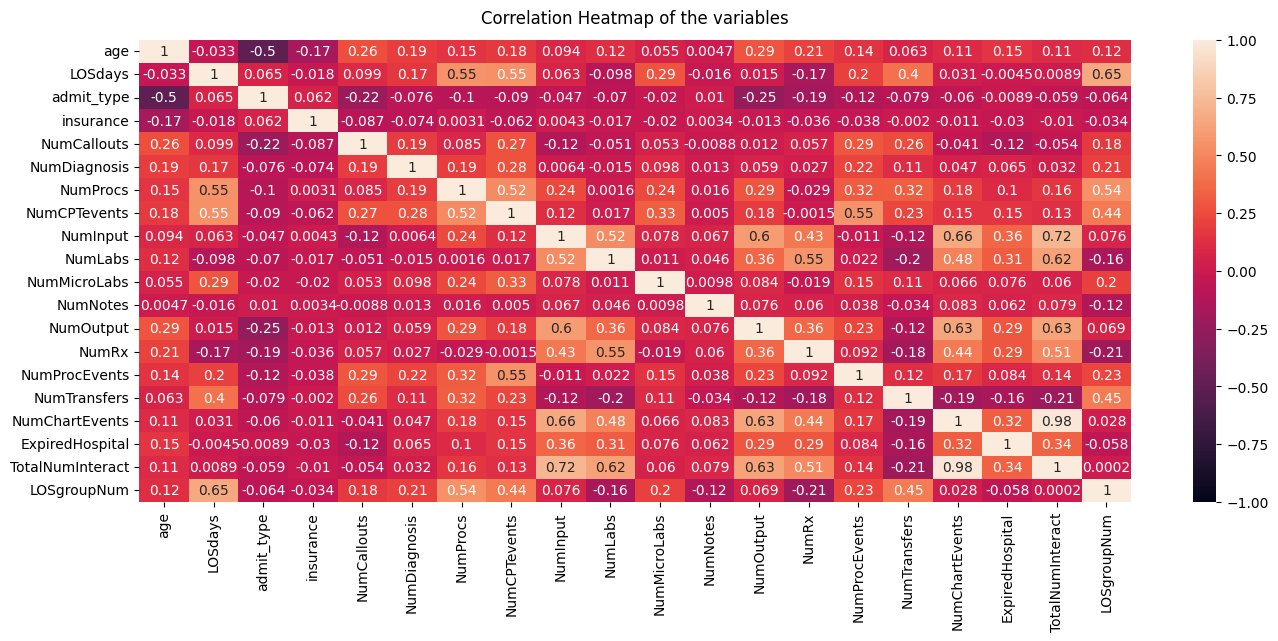

In [107]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap of the variables', fontdict={'fontsize':12}, pad=12);

In [108]:
# we need to drop some independent variables that correlate highly with themselselves
#FROM THE matrix there seems to be high correlation of numchartEvents with totalnumInteract of 0.98 and also  numchartEvents with numinput
#there is also a high corelation between LosDays with numProcess , numEvents and LosGroup to avoid multicollinearity, we will drop them
#ie drop    numchartEvents and LosDays


<Axes: xlabel='admit_location', ylabel='count'>

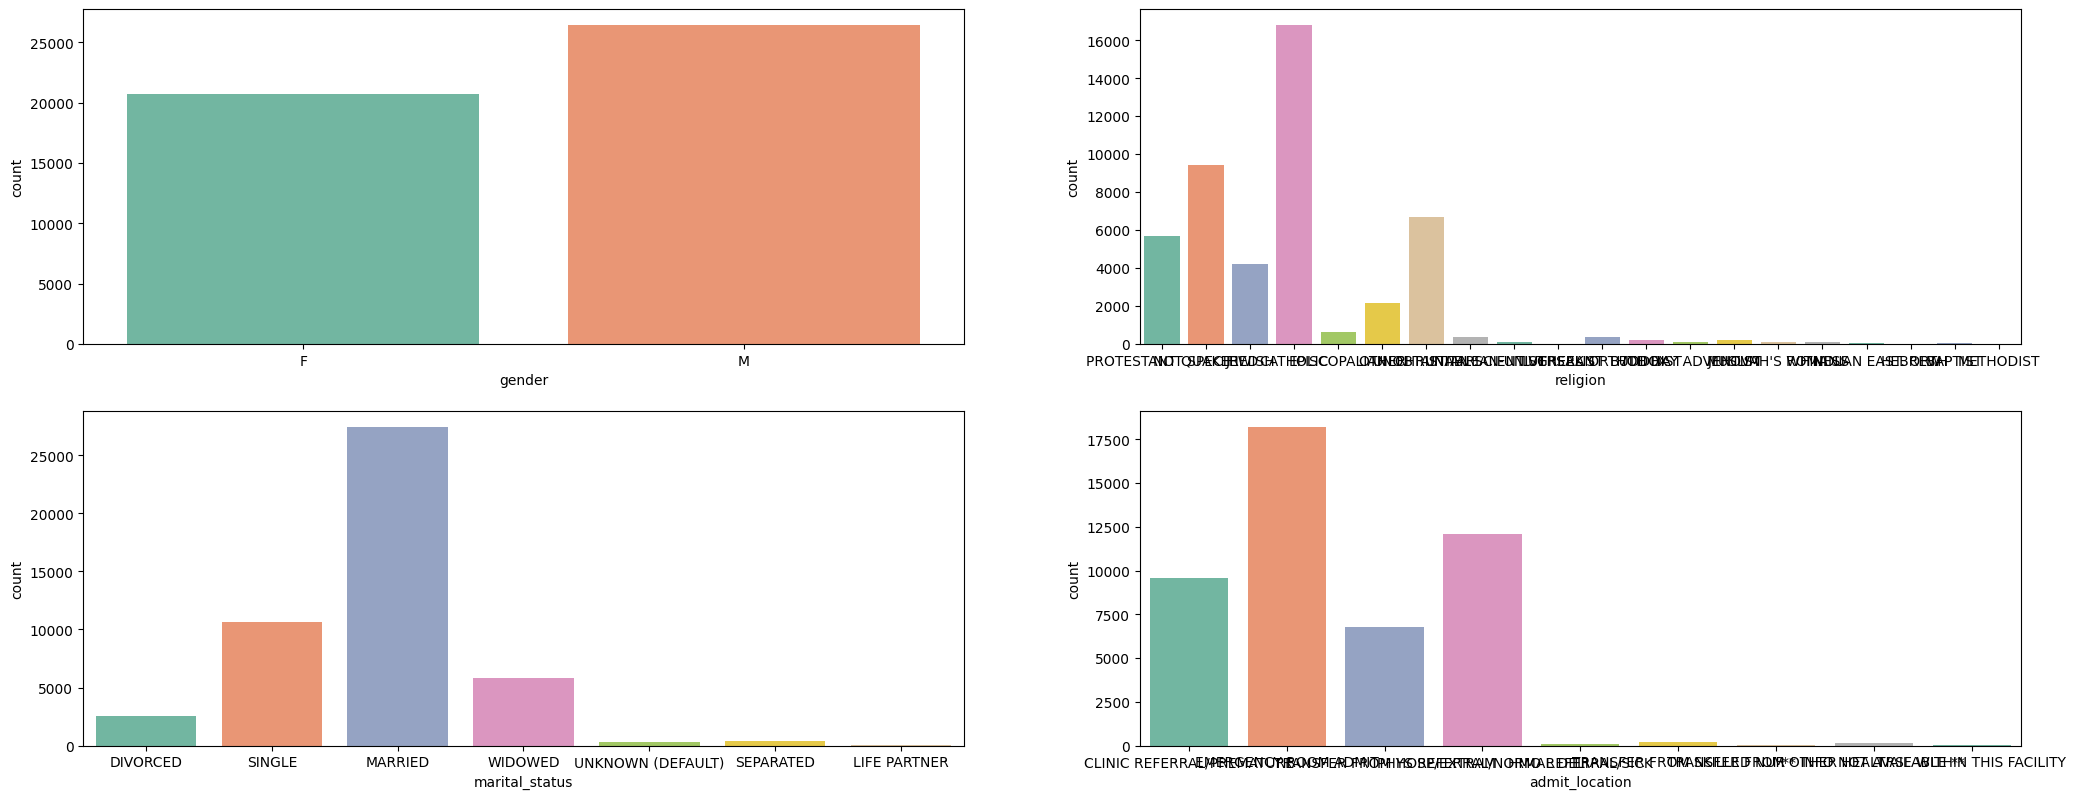

In [109]:
plt.figure(figsize = (25,20))

plt.subplot(4,2,1)
sns.countplot(x = 'gender', palette = 'Set2', data = df)

plt.subplot(4,2,2)
sns.countplot(x = 'religion', palette = 'Set2', data = df)

plt.subplot(4,2,3)
sns.countplot(x = 'marital_status', palette = 'Set2', data = df)

plt.subplot(4,2,4)
sns.countplot(x = 'admit_location', palette = 'Set2', data = df)

In [110]:
df.nunique()

gender                  2
age                    78
LOSdays               153
admit_type              4
admit_location          9
AdmitDiagnosis      13008
insurance               5
religion               20
marital_status          7
ethnicity              41
NumCallouts             9
NumDiagnosis           73
NumProcs               41
AdmitProcedure       1200
NumCPTevents          201
NumInput              489
NumLabs               549
NumMicroLabs          285
NumNotes               76
NumOutput              84
NumRx                 172
NumProcEvents         136
NumTransfers           24
NumChartEvents       2355
ExpiredHospital         2
TotalNumInteract     2799
LOSgroupNum             4
dtype: int64

In [111]:
df.shape

(47160, 27)

In [112]:
df.columns

Index(['gender', 'age', 'LOSdays', 'admit_type', 'admit_location',
       'AdmitDiagnosis', 'insurance', 'religion', 'marital_status',
       'ethnicity', 'NumCallouts', 'NumDiagnosis', 'NumProcs',
       'AdmitProcedure', 'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs',
       'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers',
       'NumChartEvents', 'ExpiredHospital', 'TotalNumInteract', 'LOSgroupNum'],
      dtype='object')

In [113]:
df.drop(['admit_location', 'AdmitDiagnosis','ethnicity','AdmitProcedure', 'religion'], axis=1, inplace=True)

In [114]:
df = df.dropna()
test.drop([ 'AdmitDiagnosis'], axis=1, inplace=True)

In [115]:
df.dtypes

gender               object
age                 float64
LOSdays               int64
admit_type            int64
insurance             int64
marital_status       object
NumCallouts         float64
NumDiagnosis          int64
NumProcs              int64
NumCPTevents          int64
NumInput              int64
NumLabs               int64
NumMicroLabs          int64
NumNotes              int64
NumOutput             int64
NumRx                 int64
NumProcEvents         int64
NumTransfers          int64
NumChartEvents        int64
ExpiredHospital       int64
TotalNumInteract      int64
LOSgroupNum         float64
dtype: object

In [116]:
df = df.dropna()


In [117]:
df.columns

Index(['gender', 'age', 'LOSdays', 'admit_type', 'insurance', 'marital_status',
       'NumCallouts', 'NumDiagnosis', 'NumProcs', 'NumCPTevents', 'NumInput',
       'NumLabs', 'NumMicroLabs', 'NumNotes', 'NumOutput', 'NumRx',
       'NumProcEvents', 'NumTransfers', 'NumChartEvents', 'ExpiredHospital',
       'TotalNumInteract', 'LOSgroupNum'],
      dtype='object')

## test data preprocessing

In [118]:
 df.columns

Index(['gender', 'age', 'LOSdays', 'admit_type', 'insurance', 'marital_status',
       'NumCallouts', 'NumDiagnosis', 'NumProcs', 'NumCPTevents', 'NumInput',
       'NumLabs', 'NumMicroLabs', 'NumNotes', 'NumOutput', 'NumRx',
       'NumProcEvents', 'NumTransfers', 'NumChartEvents', 'ExpiredHospital',
       'TotalNumInteract', 'LOSgroupNum'],
      dtype='object')

In [119]:
# handling missing values
test['marital_status']=test['marital_status'].fillna(test['marital_status'].mode()[0])

test['age']=test['age'].fillna(test['age'].mean())
test['NumCallouts']=test['NumCallouts'].fillna(test['NumCallouts'].mean())

In [120]:
test = test.dropna()


In [121]:
test.dtypes

gender               object
age                 float64
LOSdays               int64
admit_type            int64
admit_location       object
insurance             int64
religion             object
marital_status       object
ethnicity            object
NumCallouts         float64
NumDiagnosis          int64
NumProcs              int64
AdmitProcedure       object
NumCPTevents          int64
NumInput              int64
NumLabs               int64
NumMicroLabs          int64
NumNotes              int64
NumOutput             int64
NumRx                 int64
NumProcEvents         int64
NumTransfers          int64
NumChartEvents        int64
TotalNumInteract      int64
LOSgroupNum         float64
dtype: object

In [122]:
test.columns

Index(['gender', 'age', 'LOSdays', 'admit_type', 'admit_location', 'insurance',
       'religion', 'marital_status', 'ethnicity', 'NumCallouts',
       'NumDiagnosis', 'NumProcs', 'AdmitProcedure', 'NumCPTevents',
       'NumInput', 'NumLabs', 'NumMicroLabs', 'NumNotes', 'NumOutput', 'NumRx',
       'NumProcEvents', 'NumTransfers', 'NumChartEvents', 'TotalNumInteract',
       'LOSgroupNum'],
      dtype='object')

In [123]:
#saving
print(df.shape)
print(test.shape)

(4731, 22)
(1154, 25)


In [124]:
df.columns

Index(['gender', 'age', 'LOSdays', 'admit_type', 'insurance', 'marital_status',
       'NumCallouts', 'NumDiagnosis', 'NumProcs', 'NumCPTevents', 'NumInput',
       'NumLabs', 'NumMicroLabs', 'NumNotes', 'NumOutput', 'NumRx',
       'NumProcEvents', 'NumTransfers', 'NumChartEvents', 'ExpiredHospital',
       'TotalNumInteract', 'LOSgroupNum'],
      dtype='object')

In [125]:
 # numchartEvents and LosDays dropped due to multicollinearity
features = ['gender', 'age', 'admit_type', 'insurance', 'marital_status',
       'NumCallouts', 'NumDiagnosis', 'NumProcs', 'NumInput',
       'NumLabs', 'NumMicroLabs', 'NumNotes', 'NumOutput', 'NumRx',
       'NumProcEvents', 'NumTransfers', 'TotalNumInteract']
X_train = df[features]
X_test =test[features]
y_train = df['ExpiredHospital']
# we cannot initialise the y-test because its the target variable

In [126]:
print(X_test.shape, X_train.shape)


(1154, 17) (4731, 17)


In [127]:

#One Hot Encoding
# Variables to apply one hot encoding
list = ["gender", "marital_status"]

X_train = pd.get_dummies(X_train, columns =list, drop_first = True)
X_test = pd.get_dummies(X_test, columns =list, drop_first = True)



In [128]:
# Normalizing the all the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)
#
#X_test.columns = ['Tenure', 'MonthlyCharges', 'TotalCharges',
 #      'gender_Female','gender_Male',
  #     'SeniorCitizen_0','SeniorCitizen_1',
   #    'Partner_No','Partne

In [129]:
X_test

,age,admit_type,insurance,NumCallouts,NumDiagnosis,NumProcs,NumInput,NumLabs,NumMicroLabs,NumNotes,...,NumRx,NumProcEvents,NumTransfers,TotalNumInteract,gender_M,marital_status_MARRIED,marital_status_SEPARATED,marital_status_SINGLE,marital_status_UNKNOWN (DEFAULT),marital_status_WIDOWED
9,0.000000,2,1,0.000000,3,1,0,15,1,2,...,2,0,4,43,1,1,0,0,0,0
60,59.000000,1,3,1.000000,11,4,10,40,2,2,...,16,2,4,567,0,1,0,0,0,0
92,46.000000,1,3,1.000000,6,11,34,67,1,1,...,10,11,4,886,1,1,0,0,0,0
96,78.000000,1,2,0.000000,7,3,20,32,13,2,...,3,0,6,232,1,0,0,0,0,1
99,46.000000,1,4,0.000000,6,6,47,36,0,3,...,14,0,5,815,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11744,53.242603,0,3,0.000000,8,2,56,54,0,3,...,13,0,4,962,1,1,0,0,0,0
11760,79.000000,1,2,0.591549,0,0,0,102,0,0,...,44,0,0,842,0,0,0,1,0,0
11768,53.000000,0,3,0.000000,3,3,79,53,1,2,...,0,0,8,740,1,1,0,0,0,0
11781,62.000000,1,3,0.000000,12,7,8,35,3,1,...,13,17,7,331,1,1,0,0,0,0


## logistic regression

In [130]:
# K-fold splits

cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

In [131]:
# Defining all the parameters
params = {
    'penalty': ['l1','l2'],
    'C': [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10]
}

# Building model
logreg = LogisticRegression(solver='liblinear')

# Parameter estimating using GridSearch
grid = GridSearchCV(logreg, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)

# Fitting the model
grid.fit(X_train, y_train)


Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                               4, 5, 6, 7, 8, 9, 10],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [132]:
logreg_grid_val_score = grid.best_score_
print('Best Score:', logreg_grid_val_score)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

Best Score: 0.9271126760563382
Best Params: {'C': 0.7, 'penalty': 'l1'}
Best Estimator: LogisticRegression(C=0.7, penalty='l1', solver='liblinear')


In [133]:
logreg_grid = grid.best_estimator_
y_pred = logreg_grid.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ValueError: ignored

In [ ]:
 #Calculating metrics

logreg_grid_score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', logreg_grid_score)
print('Classification Report:\n', classification_report(y_test, y_pred))

In [ ]:
# Building our model with K-fold validation and GridSearch to find the best parameters
#KNNNNN
# Defining all the parameters
params = {
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform','distance']
}

# Building model
knn = KNeighborsClassifier()

# Parameter estimating using GridSearch
grid = GridSearchCV(knn, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)

# Fitting the model
grid.fit(x_train, y_train)

In [ ]:
knn_grid_val_score = grid.best_score_
print('Best Score:', knn_grid_val_score)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)


In [ ]:
knn_grid= grid.best_estimator_
y_pred = knn_grid.predict(x_test)


In [ ]:
# Calculating metrics

knn_grid_score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', knn_grid_score)
print('Classification Report:\n', classification_report(y_test, y_pred))

In [ ]:
 # Building our model with K-fold validation and GridSearch to find the best parameters

# Defining all the parameters
params = {
    'max_features': [1, 3, 10],
    'min_samples_split': [2, 3, 10],
    'min_samples_leaf': [1, 3, 10],
    'criterion': ["entropy", "gini"]
}

# Building model
dtc = DecisionTreeClassifier()

# Parameter estimating using GridSearch
grid = GridSearchCV(dtc, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)

# Fitting the model
grid.fit(x_train, y_train)

In [ ]:
dtc_grid_val_score = grid.best_score_
print('Best Score:', dtc_grid_val_score)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

In [ ]:
# Using the best parameters from the grid-search and predicting on test feature dataset(X_test)

dtc_grid= grid.best_estimator_
y_pred = dtc_grid.predict(x_test)